In [4]:
import scanpy as sc
import anndata as ad
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = sc.read("data_with_PCA_umap.h5ad")

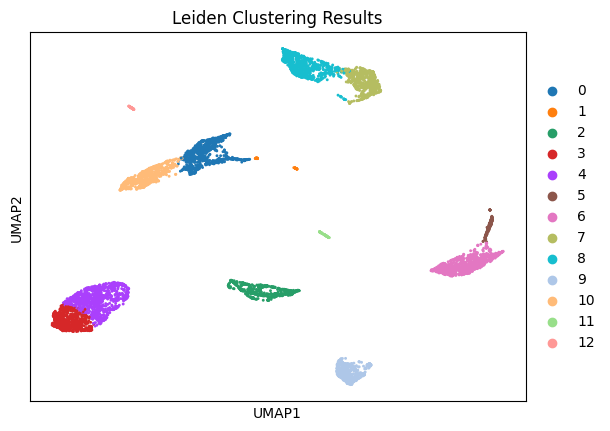

In [6]:
# Plot the UMAP with Leiden clustering results
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results')